<a href="https://colab.research.google.com/github/Sindhuhar/practice_computer_vision/blob/main/13_auto_canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-parameter, automatic Canny edge detection with Python and OpenCV

### Import Packages

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import glob
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Zero-parameter, automatic Canny edge detection with Python and OpenCV

In [ ]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)

	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	# return the edged image
	return edged

In [ ]:
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True,
# 	help="path to input dataset of images")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"images": "images"
}

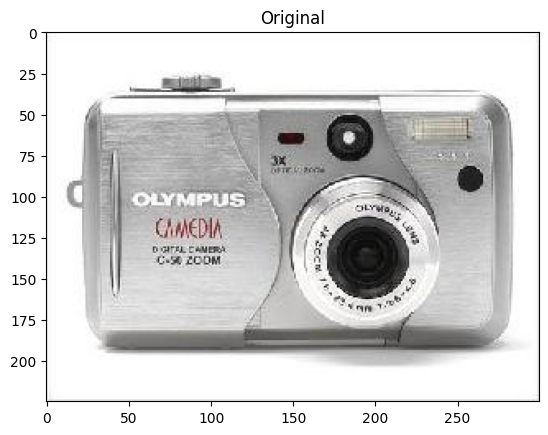

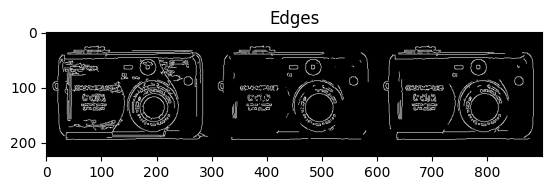

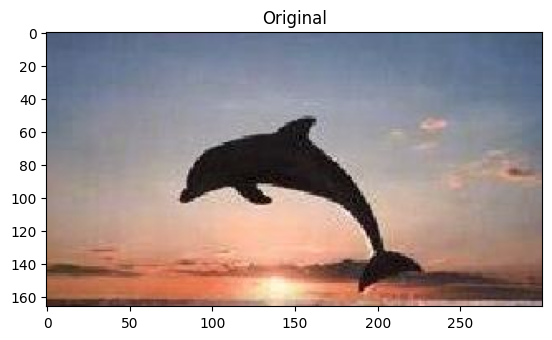

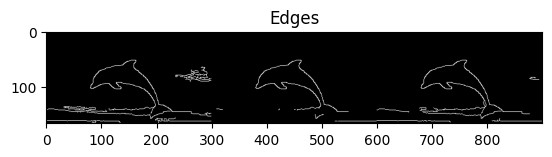

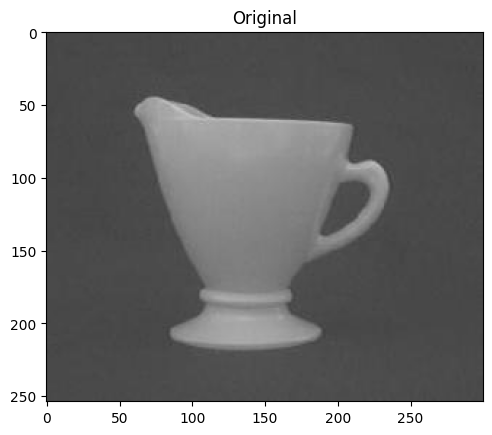

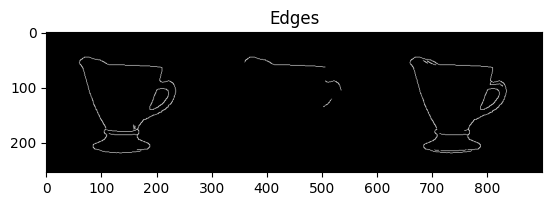

In [ ]:
# loop over the images
for imagePath in glob.glob(args["images"] + "/*.jpg"):
	# load the image, convert it to grayscale, and blur it slightly
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	blurred = cv2.GaussianBlur(gray, (3, 3), 0)

	# apply Canny edge detection using a wide threshold, tight
	# threshold, and automatically determined threshold
	wide = cv2.Canny(blurred, 10, 200)
	tight = cv2.Canny(blurred, 225, 250)
	auto = auto_canny(blurred)

	# show the images
	plt_imshow("Original", image)
	plt_imshow("Edges", np.hstack([wide, tight, auto]))